## Real-Time News Data Collection using Python

### Step 1: Fetch Live News Using NewsAPI
Here’s the function we can use to fetch news headlines:

## pip install dotenv wordcloud

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os




# load API key from .env file
load_dotenv()
API_KEY = os.getenv("NEWS_API_KEY")

# dates for the last 2 days
to_date = datetime.utcnow().date()
from_date = to_date - timedelta(days=2)

QUERY = 'India Pakistan war OR conflict OR border OR attack OR tension'
LANG = 'en'
PAGE_SIZE = 100  # max per page

def fetch_news(query, from_date, to_date, api_key, page_size=100):
    url = 'https://newsapi.org/v2/everything'
    all_articles = []
    for page in range(1, 6):  # try up to 5 pages
        params = {
            'q': query,
            'from': from_date,
            'to': to_date,
            'language': LANG,
            'pageSize': page_size,
            'page': page,
            'sortBy': 'publishedAt',
            'apiKey': api_key
        }
        response = requests.get(url, params=params)
        data = response.json()

        if data.get("status") != "ok":
            print("Error:", data.get("message"))
            break

        articles = data.get("articles", [])
        if not articles:
            break
        all_articles.extend(articles)
    return all_articles

C:\Users\madna\AppData\Local\Temp\ipykernel_17944\2355685029.py:15: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  to_date = datetime.utcnow().date()


### Step 2: Store the News Articles in a CSV

In [2]:

# fetch articles

articles = fetch_news(QUERY, from_date.isoformat(), to_date.isoformat(), API_KEY)

# convert to dataframe

df = pd.DataFrame([{

    'title': article['title'],

    'description': article['description'],

    'source': article['source']['name'],

    'published_at': article['publishedAt'],

    'url': article['url'],

    'content': article['content']

} for article in articles])


# save to CSV

df.to_csv("india_pakistan_conflict_news.csv", index=False)

print(f"{len(df)} articles saved to 'india_pakistan_conflict_news.csv'")

Error: You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.
99 articles saved to 'india_pakistan_conflict_news.csv'


### Step 3: Visualizing the Headlines with a Word Cloud

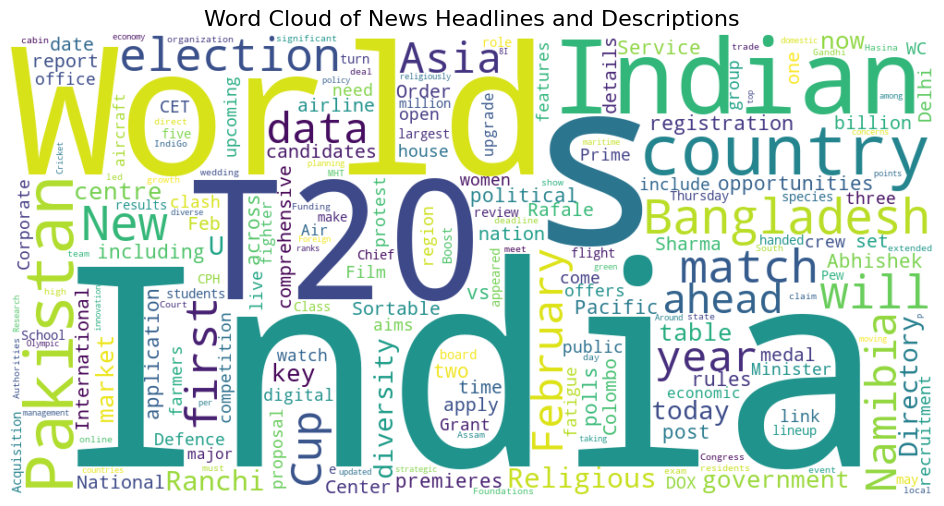

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# combine title and description text for word cloud
text_data = df['title'].fillna('') + ' ' + df['description'].fillna('')
combined_text = ' '.join(text_data.tolist())

# generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False).generate(combined_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Headlines and Descriptions", fontsize=16)
plt.show()